# This script contains:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [3]:
# Importing Datasets
df1=pd.read_csv(r'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 6/Exercises/Dataset/gun_violence_wrangled',index_col=False)
df2=pd.read_csv(r'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 6/Exercises/Dataset/gun_violence_year_on_year',index_col=False)

In [4]:
# Checking head
df1.head(50)

,incident_id,date,state,city/county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,latitude,longitude,n_guns_involved,age,age_group,gender,status,type,state_house_district,state_senate_district
0,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
1,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
2,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,1.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],...,34.9791,-106.7160,2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0
3,491674,2013-01-23,Tennessee,Chattanooga,1501 Dodds Ave,1,3,3.0,0::Unknown,0::Unknown,...,35.0221,-85.2697,1.0,0::19,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,28.0,10.0
4,479413,2013-01-25,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,1.0,0::Unknown,0::Unknown,...,38.7067,-90.2494,1.0,0::28,0::Adult 18+,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,76.0,4.0
5,479561,2013-01-26,Louisiana,Charenton,1000 block of Flat Town Road,2,3,3.0,0::Unknown,0::Shotgun,...,29.8816,-91.5251,1.0,3::78||4::48,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Killed||1::Injured||2::Injured||3::Killed||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,50.0,21.0
6,479573,2013-02-02,Tennessee,Memphis,2514 Mount Moriah,0,5,9.0,0::Unknown,0::Handgun,...,35.0803,-89.8871,1.0,5::24,0::Adult 18+||1::Adult 18+||2::Adult 18+||4::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,84.0,33.0
7,479580,2013-02-03,California,Yuba (county),5800 block of Poplar Avenue,1,3,3.0,0::Unknown,0::9mm,...,39.1236,-121.5830,1.0,0::20||4::25||5::18||6::19,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||4::Male||5::Male|...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,3.0,4.0
8,479603,2013-02-09,Louisiana,New Orleans,400 block of Bourbon Street,0,4,2.0,0::Unknown,0::Handgun,...,29.9563,-90.0676,1.0,0::18||1::22||2::21||3::29||4::19||5::22||6::23,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Female||2::Female||3::Male||4::Mal...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,93.0,4.0
9,480327,2013-02-11,Delaware,Wilmington,500 North King Street,3,2,1.0,0::Unknown,0::45 Auto,...,39.7407,-75.5499,1.0,1::39||4::68,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Male||3::Male||4::Male,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2.0,3.0


In [5]:
df2.head()

,date,state,n_killed,n_injured,age_group,gender,status,year,month,day
0,2013-01-01,Ohio,1,3,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",2013,1,1
1,2013-01-07,North Carolina,2,2,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,2013,1,7
2,2013-01-19,New Mexico,5,0,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,2013,1,19
3,2013-01-23,Tennessee,1,3,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Killed||1::Injured||2::Injured||3::Injured,2013,1,23
4,2013-01-25,Missouri,1,3,0::Adult 18+,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,2013,1,25


## Who are the victims of gun violence?

This question will be answered by analysing the age_group and gender columns and the number of people killed and n_injured. The columns required splitting of data.

In [8]:
# Creating "total_gun_victims" columns based on "n_killed" and "n_injured" columns
df2['total_gun_victims'] = df2['n_killed']+df2['n_injured']
df2['total_gun_victims'].value_counts()

total_gun_victims
1      36522
2       6594
3       1457
4        496
5        179
6         61
7         35
8         20
9         10
10         6
12         5
19         2
17         2
18         2
15         2
11         2
20         1
35         1
103        1
21         1
25         1
47         1
16         1
34         1
Name: count, dtype: int64

In [9]:
#Checking number of columns after column creation
df2.columns

Index(['date', 'state', 'n_killed', 'n_injured', 'age_group', 'gender',
       'status', 'year', 'month', 'day', 'total_gun_victims'],
      dtype='object')

In [10]:
# Splitting age_group and gender category columns into multiple columns
def split_participant_column(df2, column_name, category_mapping):
    category_counts = {new_col: [] for new_col in category_mapping.values()}

    for entry in df2[column_name].fillna(''):
        counts = {key: 0 for key in category_mapping.values()}
        
        for item in entry.split('||'):
            if '::' in item:
                idx, category = item.split('::')
                if category in category_mapping:
                    counts[category_mapping[category]] += 1
        
        for key in counts:
            category_counts[key].append(counts[key])
    
    counts_df = pd.DataFrame(category_counts)
    df2 = pd.concat([df2, counts_df], axis=1)
    
    return df2
# Defining category mappings for each participant column
age_group_mapping = {
    'Adult 18+': 'n_adults',
    'Teen 12-17': 'n_teens',
    'Child 0-11': 'n_children'
}

gender_mapping = {
    'Male': 'n_males',
    'Female': 'n_females'}
    
 # Split each participant column

df2 = split_participant_column(df2, 'age_group', age_group_mapping)
df2 = split_participant_column(df2, 'gender', gender_mapping)


In [11]:
df2.columns

Index(['date', 'state', 'n_killed', 'n_injured', 'age_group', 'gender',
       'status', 'year', 'month', 'day', 'total_gun_victims', 'n_adults',
       'n_teens', 'n_children', 'n_males', 'n_females'],
      dtype='object')

In [12]:
df2.isnull().sum()

date                 0
state                0
n_killed             0
n_injured            0
age_group            0
gender               0
status               0
year                 0
month                0
day                  0
total_gun_victims    0
n_adults             0
n_teens              0
n_children           0
n_males              0
n_females            0
dtype: int64

In [13]:
# Checking info of relevant colums
df2[['n_killed', 'n_injured','total_gun_victims','n_adults','n_teens', 'n_children', 'n_males', 'n_females']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45403 entries, 0 to 45402
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   n_killed           45403 non-null  int64
 1   n_injured          45403 non-null  int64
 2   total_gun_victims  45403 non-null  int64
 3   n_adults           45403 non-null  int64
 4   n_teens            45403 non-null  int64
 5   n_children         45403 non-null  int64
 6   n_males            45403 non-null  int64
 7   n_females          45403 non-null  int64
dtypes: int64(8)
memory usage: 2.8 MB


In [14]:
df2[['n_killed', 'n_injured','age_group', 'gender','total_gun_victims','n_adults','n_teens', 'n_children', 'n_males', 'n_females']].head()

,n_killed,n_injured,age_group,gender,total_gun_victims,n_adults,n_teens,n_children,n_males,n_females
0,1,3,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,4,5,0,0,5,0
1,2,2,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,4,3,1,0,2,2
2,5,0,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,5,2,1,3,3,3
3,1,3,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,4,1,0,0,4,0
4,1,3,0::Adult 18+,0::Male,4,1,0,0,1,0


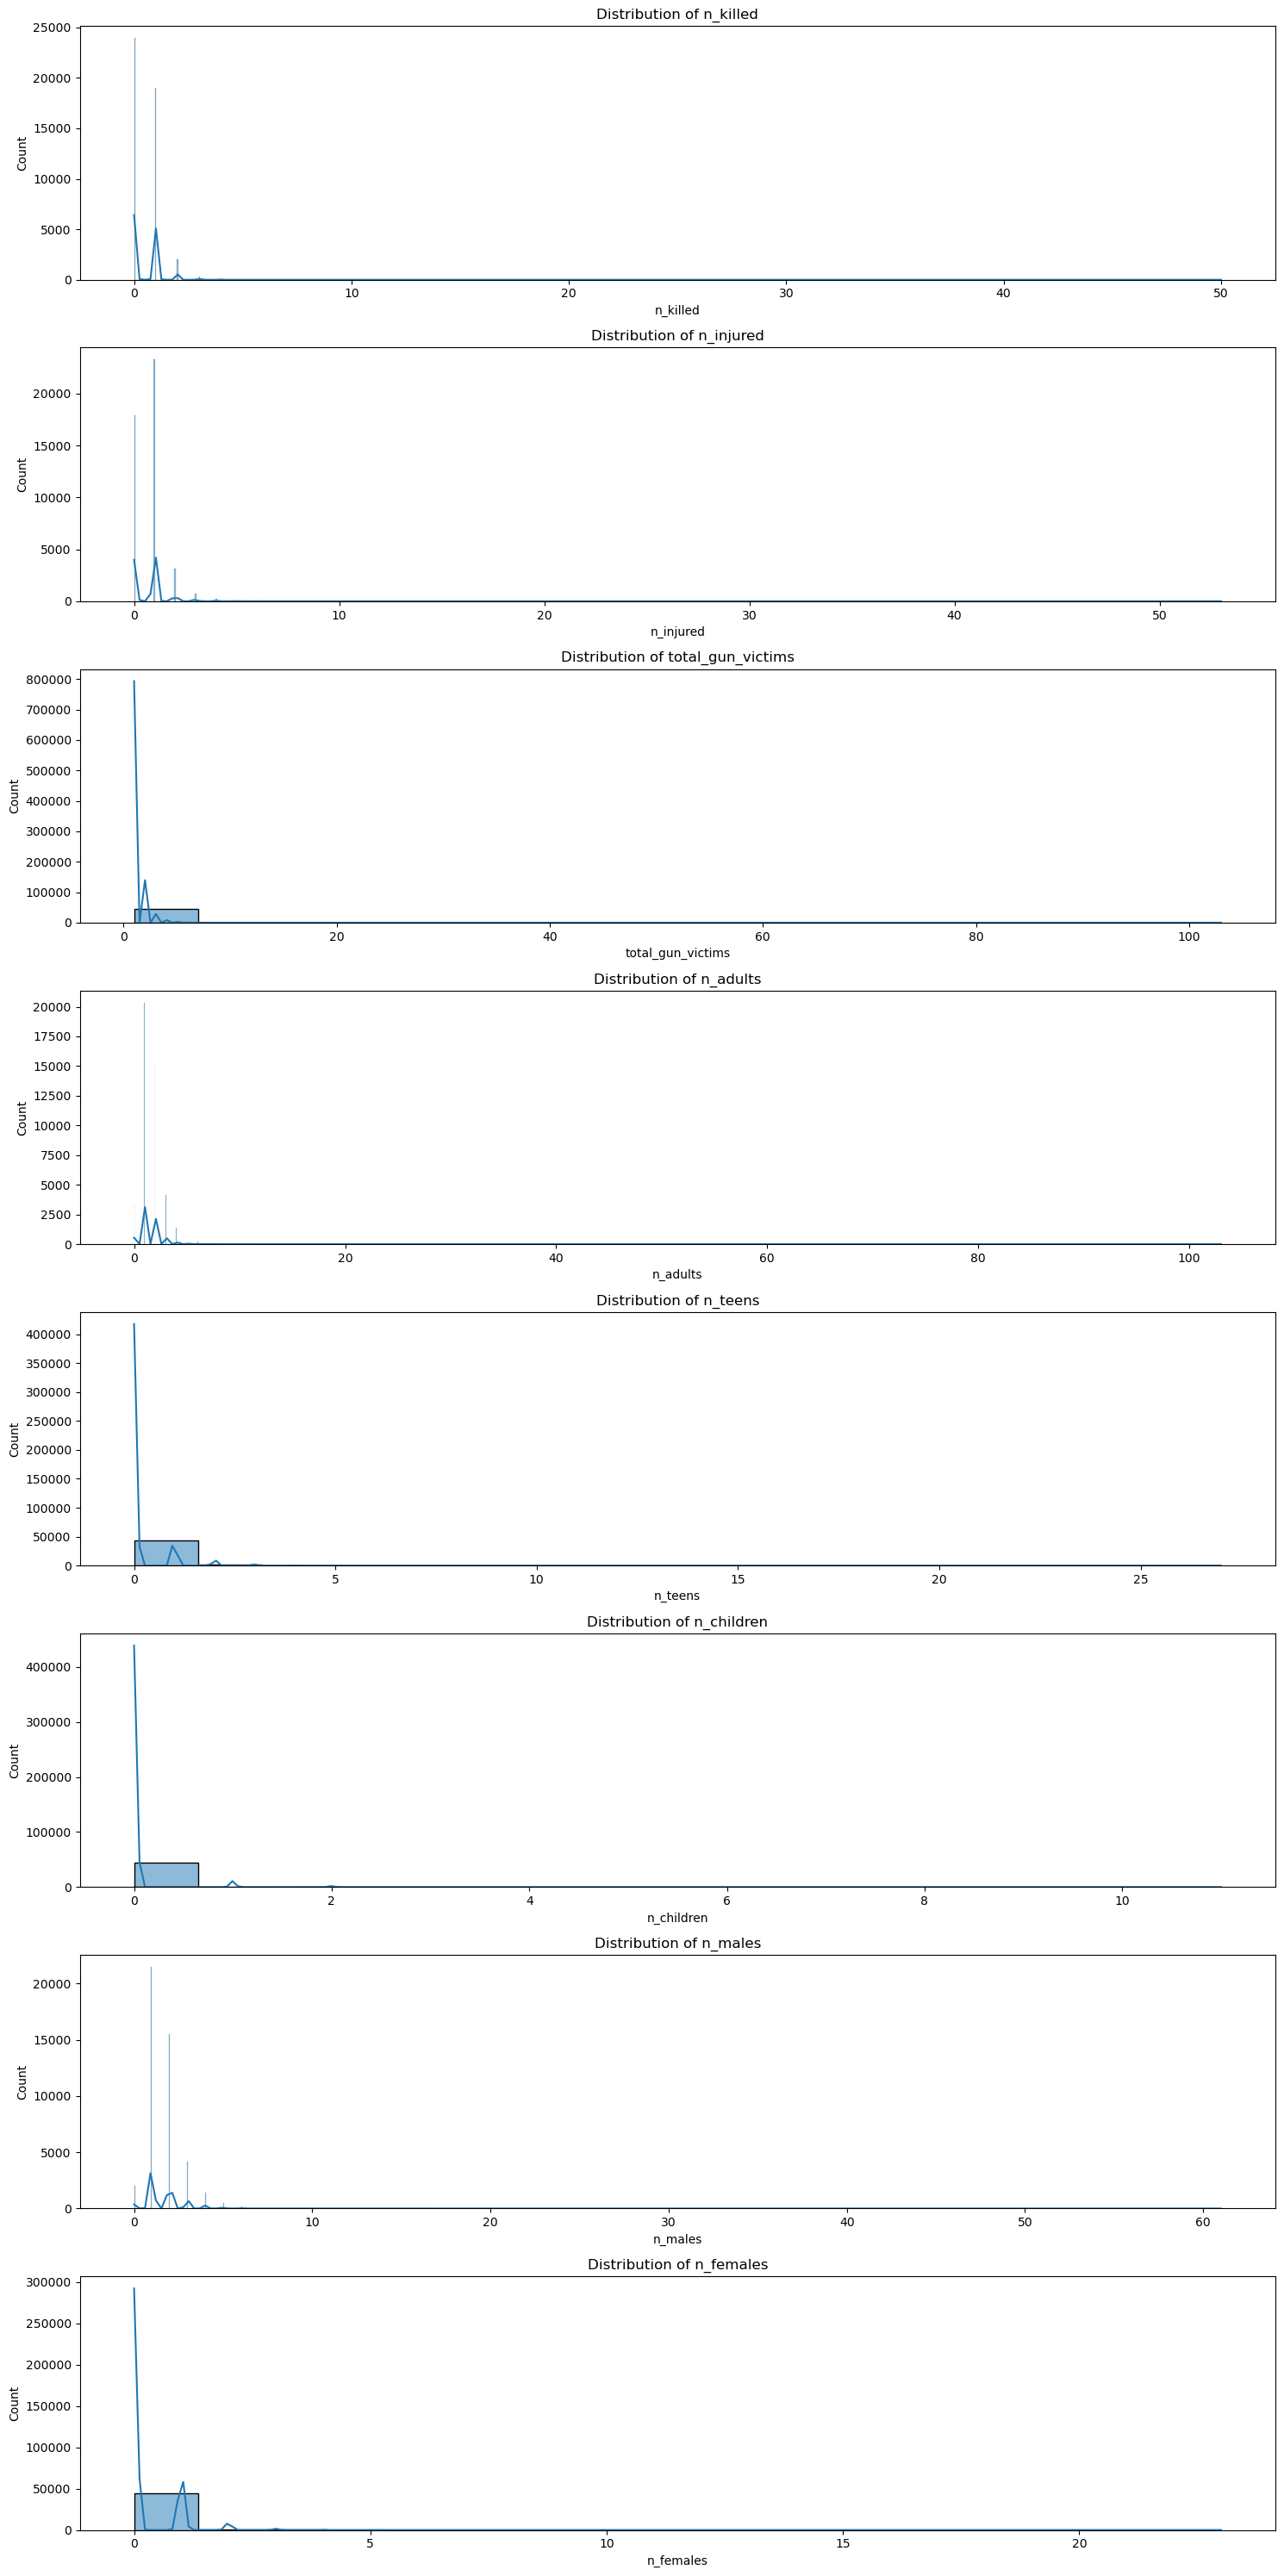

In [15]:
columns = ['n_killed', 'n_injured', 'total_gun_victims','n_adults', 'n_teens', 'n_children', 'n_males', 'n_females']
distribution_df = df2[columns]
num_cols = distribution_df.shape[1]

plt.figure(figsize=(15, 30))

for i, col in enumerate(distribution_df.columns):
    plt.subplot(num_cols, 1, i + 1)
    sns.histplot(distribution_df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [16]:
df2.columns

Index(['date', 'state', 'n_killed', 'n_injured', 'age_group', 'gender',
       'status', 'year', 'month', 'day', 'total_gun_victims', 'n_adults',
       'n_teens', 'n_children', 'n_males', 'n_females'],
      dtype='object')

In [17]:
#Export data
df2.to_csv('gun_violence_comprehensive.csv',index=False)